In [24]:
import pandas as pd

data1 = pd.read_csv("votegetters_withratios.csv")
data2 = pd.read_csv("pergame_advanced.csv")

#replace space with _
data1.columns = [c.replace(' ', '_') for c in data1.columns]

#s is short for sliced
data1_s = data1[['Year', 'Player', 'MVP', 'Share', 'Win_Ratio']]
data2.columns
data2_s = data2[['Age', 'Tm', 'Pos',
                 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
                 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
                 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
                 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]

data = pd.concat([data1_s, data2_s], axis=1)
data = data[['Year', 'Player', 'Age', 'Tm', 'Pos', 'MVP', 'Share', 'Win_Ratio', 'G', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP']]

data.to_csv("NBA_MVP_votegetters_data.csv")

In [41]:
import statsmodels.api as sm

data = data.fillna(0)
y = data['Share']
X = data.loc[:, 'Win_Ratio':'VORP']

model = sm.OLS(y, X).fit()

X = data.loc[:, ['Win_Ratio', 'FT%', 'PF', 'TS%', 'TOV%']]
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Share   R-squared (uncentered):                   0.374
Model:                            OLS   Adj. R-squared (uncentered):              0.369
Method:                 Least Squares   F-statistic:                              81.16
Date:                Sat, 11 Jun 2022   Prob (F-statistic):                    8.70e-67
Time:                        12:57:29   Log-Likelihood:                          7.2450
No. Observations:                 685   AIC:                                     -4.490
Df Residuals:                     680   BIC:                                      18.16
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Win_Ratio      0.6456      0.088      7.341      0.000       0.473       0.818
FT%           -0.4426      0.106     -4.193      0.000      -0.650      -0.235
PF            -0.0502      0.015     -3.450      0.001      -0.079      -0.022
TS%            0.6897      0.208      3.311      0.001       0.281       1.099
TOV%          -0.0123      0.003     -4.541      0.000      -0.018      -0.007
==============================================================================
Omnibus:                      169.730   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.794
Skew:                           1.469   Prob(JB):                     2.67e-69
Kurtosis:                       4.558   Cond. No.                         348.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

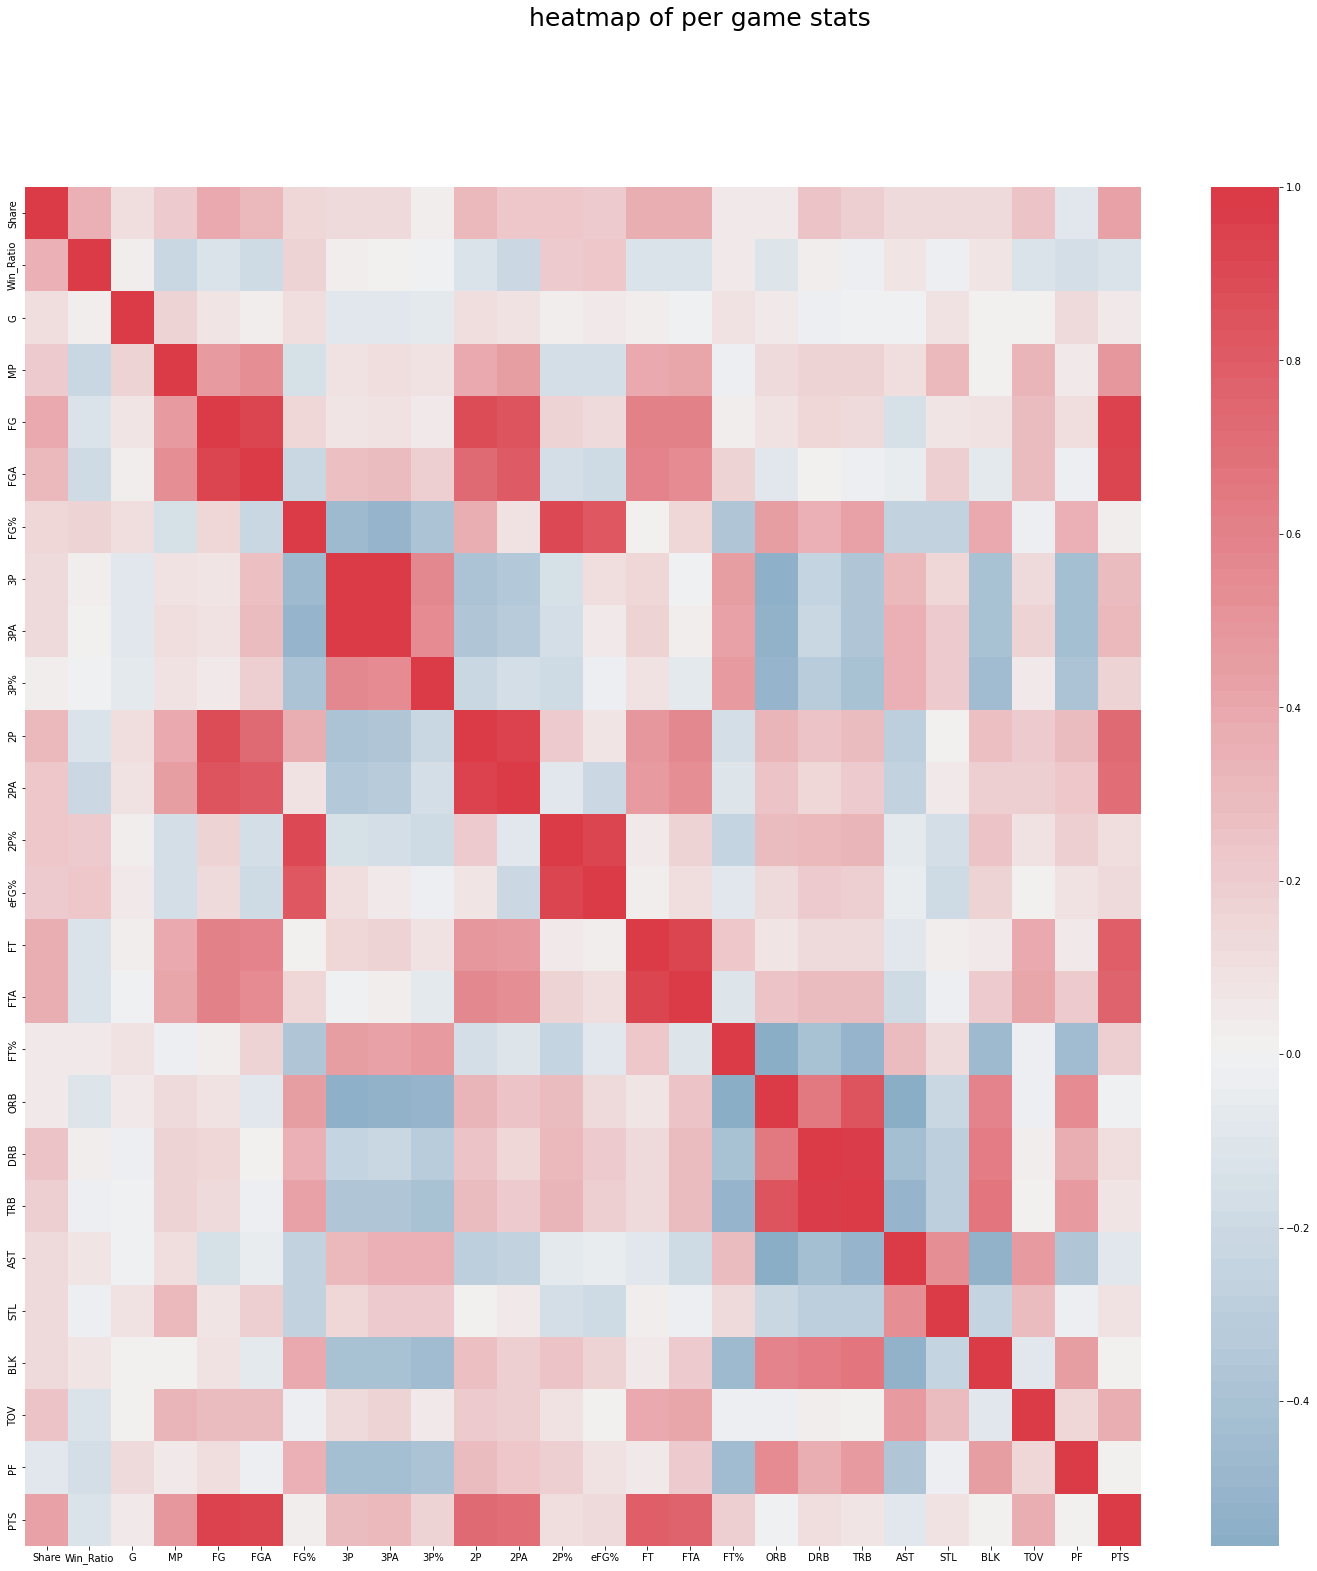

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pergame_columns = ['Share', 'Win_Ratio', 'G',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS']

pergame = data.loc[:, pergame_columns]
pergame_corr = pergame.corr()
pergame_mask = np.tril(pergame_corr)

f1 = plt.figure(figsize=(25,25))
plt.suptitle("heatmap of per game stats", fontsize=25)
rdbl = sns.diverging_palette(240, 10, n=100)
sns.heatmap(pergame.corr(), cmap=rdbl, center=0.00)

f1.savefig('pergame_heatmap.png')

In [71]:
data.columns

Index(['Year', 'Player', 'Age', 'Tm', 'Pos', 'MVP', 'Share', 'Win_Ratio', 'G',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

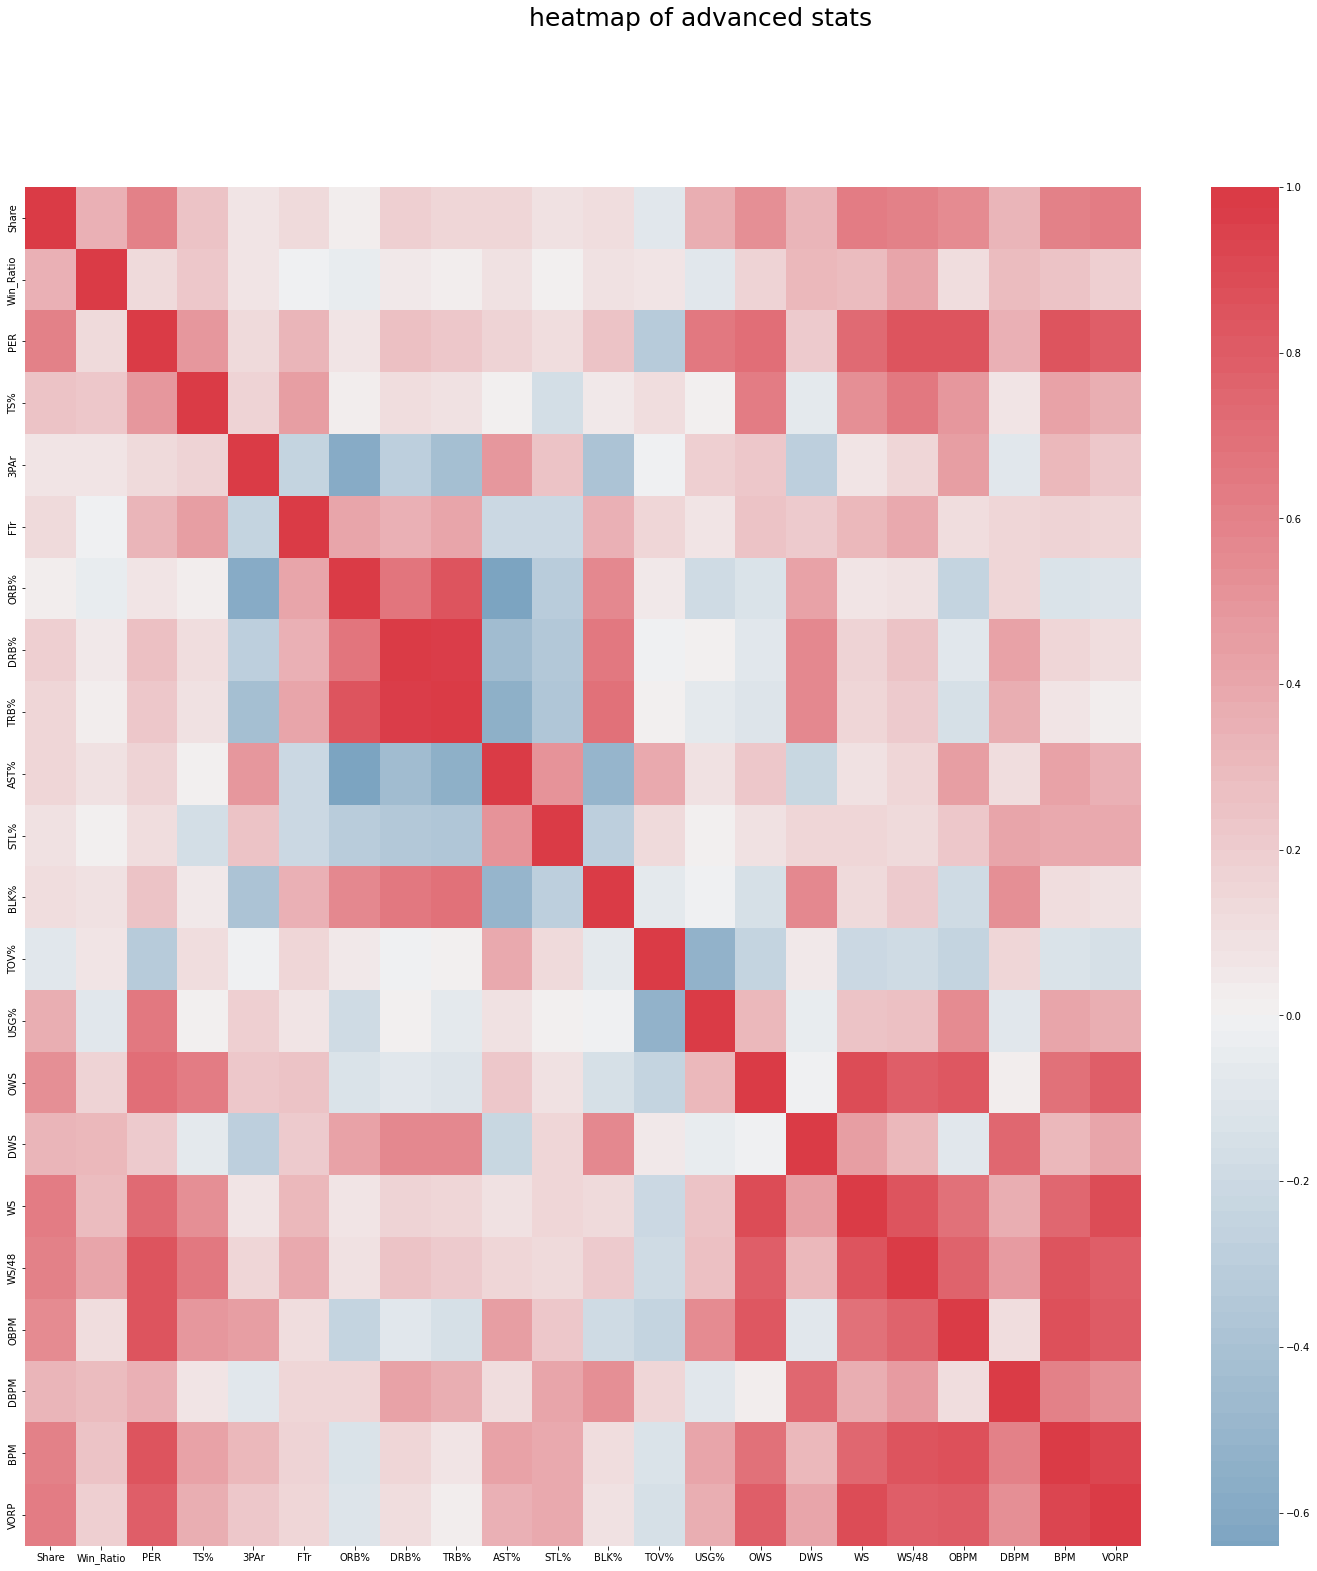

In [79]:
advanced = data[['Share', 'Win_Ratio', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP']]
advanced_corr = advanced.corr()
advanced_mask = np.tril(advanced_corr)

f2 = plt.figure(figsize=(25,25))
plt.suptitle("heatmap of advanced stats", fontsize=25)
rdbl = sns.diverging_palette(240, 10, n=100)
sns.heatmap(advanced_corr, cmap=rdbl, center=0.00)
f2.savefig('advanced_heatmap.png')

In [77]:
y = advanced['Share']
X = advanced.loc[:, 'PER':'VORP']
advanced_model = sm.OLS(y, X).fit()
advanced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Share   R-squared (uncentered):                   0.666
Model:                            OLS   Adj. R-squared (uncentered):              0.656
Method:                 Least Squares   F-statistic:                              66.30
Date:                Sun, 12 Jun 2022   Prob (F-statistic):                   1.82e-143
Time:                        00:23:13   Log-Likelihood:                          222.56
No. Observations:                 685   AIC:                                     -405.1
Df Residuals:                     665   BIC:                                     -314.5
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PER            0.0013      0.015      0.091      0.928      -0.027       0.030
TS%           -2.0391      0.236     -8.657      0.000      -2.502      -1.577
3PAr          -0.0809      0.088     -0.924      0.356      -0.253       0.091
FTr           -0.3511      0.079     -4.461      0.000      -0.506      -0.197
ORB%          -0.0635      0.023     -2.763      0.006      -0.109      -0.018
DRB%          -0.0623      0.024     -2.559      0.011      -0.110      -0.015
TRB%           0.1226      0.048      2.541      0.011       0.028       0.217
AST%          -0.0050      0.002     -2.976      0.003      -0.008      -0.002
STL%          -0.0560      0.020     -2.773      0.006      -0.096      -0.016
BLK%          -0.0177      0.011     -1.548      0.122      -0.040       0.005
TOV%           0.0314      0.004      7.071      0.000       0.023       0.040
USG%           0.0177      0.005      3.893      0.000       0.009       0.027
OWS            0.0843      0.141      0.598      0.550      -0.192       0.361
DWS            0.0757      0.141      0.538      0.591      -0.201       0.352
WS            -0.0635      0.141     -0.452      0.652      -0.340       0.212
WS/48          2.7163      1.129      2.407      0.016       0.500       4.933
OBPM          -0.1924      0.142     -1.356      0.176      -0.471       0.086
DBPM          -0.1767      0.141     -1.249      0.212      -0.454       0.101
BPM            0.1898      0.144      1.314      0.189      -0.094       0.473
VORP           0.0263      0.041      0.647      0.518      -0.054       0.106
==============================================================================
Omnibus:                       69.210   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.986
Skew:                           0.774   Prob(JB):                     6.43e-21
Kurtosis:                       3.928   Cond. No.                     8.68e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""